In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [4]:
from snntoolbox.config import update_setup

settings = {'path_wd': '/home/rbodo/.snntoolbox/data/imagenet/inception_lasagne/',
            'dataset_path': '/home/rbodo/.snntoolbox/Datasets/imagenet/GoogLeNet',
            'dataset_format': 'npz',
            'filename_ann': 'inception',
            'model_lib': 'lasagne',
            'evaluateANN': True,
            'normalize': False,
            'convert': True,
            'simulate': True,
            'simulator': 'INI',
            'duration': 200,
            'batch_size': 20,
            'verbose': 1,
            'num_to_test': 1000,
            'runlabel': 'test',
            'percentile': 100.0,
            'normalization_schedule': False
            }

update_setup(settings)

True

In [5]:
from importlib import import_module
from snntoolbox.config import settings

model_lib = import_module('snntoolbox.model_libs.' +
                          settings['model_lib'] + '_input_lib')
input_model = model_lib.load_ann(settings['path_wd'],
                                 settings['filename_ann'])
model = input_model['model']

Loading parameters from .pkl


In [3]:
from snntoolbox.core.util import get_dataset

evalset, normset, testset = get_dataset(settings)

Using Theano backend.


Loading data set from '.npz' files in /home/rbodo/.snntoolbox/Datasets/imagenet/GoogLeNet.



In [4]:
model_lib.evaluate(input_model['val_fn'], **evalset)


Test loss: 1.00
Test accuracy: 76.40%



(0.99925054192543028, 0.76399999687075615)

In [6]:
import lasagne

layers = lasagne.layers.get_all_layers(model)

In [15]:
pool = layers[-2]

In [19]:
pool.input_shape

(None, 2048, 8, 8)

In [7]:
from snntoolbox.core.util import parse

parsed_model = parse(input_model['model'])

Skipping layer InputLayer
Parsing layer Convolution2D
Detected activation relu
[(32,), (32,), (32,), (32,)]
[(32, 3, 3, 3), (32,)]
Absorbing batch-normalization parameters into parameters of previous 00Convolution2D_32x149x149.
Skipping layer BatchNormalization
Skipping layer Activation
Parsing layer Convolution2D
Detected activation relu
[(32,), (32,), (32,), (32,)]
[(32, 32, 3, 3), (32,)]
Absorbing batch-normalization parameters into parameters of previous 01Convolution2D_32x147x147.
Skipping layer BatchNormalization
Skipping layer Activation
Parsing layer Convolution2D
Detected activation relu
[(64,), (64,), (64,), (64,)]
[(64, 32, 3, 3), (64,)]
Absorbing batch-normalization parameters into parameters of previous 02Convolution2D_64x147x147.
Skipping layer BatchNormalization
Skipping layer Activation
Parsing layer MaxPooling2D
Parsing layer Convolution2D
Detected activation relu
[(80,), (80,), (80,), (80,)]
[(80, 64, 1, 1), (80,)]
Absorbing batch-normalization parameters into paramet

KeyError: '140074386301112'

In [42]:
from snntoolbox.core.util import get_activ_fn_for_layer

activ0_model = get_activ_fn_for_layer(model, 1)
activ1_model = get_activ_fn_for_layer(model, 2)
activ1_parsed = get_activ_fn_for_layer(parsed_model, 1)

In [27]:
model.layers[2].get_config()

{'axis': 1,
 'beta_regularizer': None,
 'epsilon': 1e-05,
 'gamma_regularizer': None,
 'mode': 0,
 'momentum': 0.99,
 'name': 'batchnormalization_1',
 'trainable': True}

In [10]:
parsed_model.layers[1].get_config()

{'W_constraint': None,
 'W_regularizer': None,
 'activation': 'relu',
 'activity_regularizer': None,
 'b_constraint': None,
 'b_regularizer': None,
 'batch_input_shape': (20, 3, 299, 299),
 'bias': True,
 'border_mode': 'valid',
 'dim_ordering': 'th',
 'init': 'glorot_uniform',
 'input_dtype': 'float32',
 'name': '01Convolution2D_32x149x149',
 'nb_col': 3,
 'nb_filter': 32,
 'nb_row': 3,
 'subsample': (2, 2),
 'trainable': True}

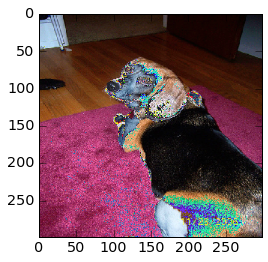

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
x = testset['x_test'][1:2]
plt.imshow(x[0].transpose((1, 2, 0)))

In [43]:
from snntoolbox.core.util import get_activations_layer

a0_model = get_activations_layer(activ0_model, x)
a1_model = get_activations_layer(activ1_model, x)
a1_parsed = get_activations_layer(activ1_parsed, x)

In [44]:
import numpy as np
np.sum(np.abs(a0_model-a1_parsed))

136598.23359560966

In [45]:
from snntoolbox.io_utils.plotting import plot_layer_activity

plot_path = '/home/rbodo/Downloads'
plot_layer_activity((a0_model[0], 'Conv1'), 'a0_model', plot_path)
plot_layer_activity((a1_model[0], 'Conv1'), 'a1_model', plot_path)
plot_layer_activity((a1_parsed[0], 'Conv1'), 'a1_parsed', plot_path)